### Problem Statement:
To predict if a customer will repay loan or not using decision tree algorithm


In [36]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [37]:
#load dataset
df = pd.read_csv("D:\\ML\\Machine Learning Full\\Decision Tree\\Decision_Tree_ Dataset.csv", sep= ',', header= 0)

df.shape  #dataset contains 1000 rows and 6 columns

(1000, 6)

In [38]:
df.head(5)

,initialpayment,lastpayment,creditscore,housenumber,sum,results
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [39]:
X = df.values[:, 0:4]
Y = df.values[:,5]

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'max_depth': None, 'min_samples_leaf': 2}


### min_samples_leaf 
tells minimum number of samples required at a leaf.Small value: more detailed splits and possible overfitting.Larger value: smoother model → better generalization

### max_depth 
tells how deep the tree can grow. choose the value randomly and wisely. Large depth: complex model and overfitting.Small depth: simple model and underfitting.

### Rule of thumb:
Small dataset → use smaller values (1–5)
Large dataset → use slightly larger values (5–20)

Recommended Strategy:

Instead of guessing:
Use Cross Validation
Use GridSearchCV
Compare training vs testing accuracy
Check confusion matrix & F1 score

In [42]:

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=None, min_samples_leaf=2)

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       random_state=100)

In [43]:
y_pred= clf_entropy.predict(X_test)
y_pred

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'No', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes', 'No', 'No',
       'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes',
       'yes', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'yes',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'yes', 'y

In [45]:
print ("Accuracy:", accuracy_score(y_test,y_pred)*100)

Accuracy: 95.5


In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[93  5]
 [ 4 98]]


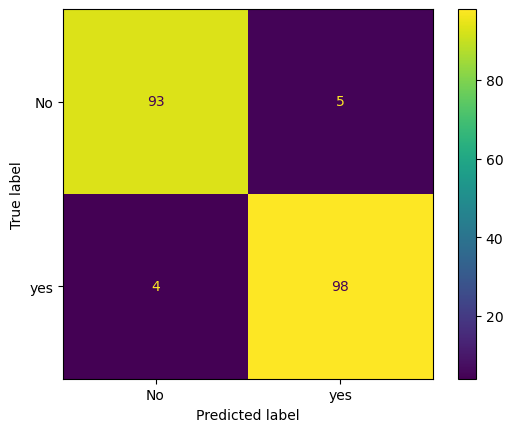

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)